# Практическая работа 2. Источники данных. Извлечение данных

ФИО: Аросев Максим Георгиевич

Группа: БД-231м

## Задание 2.1

Используем данные из открытого источника для `CSV`, `Parquet` и `API`, а также вручную подготовим данные для баз данных и HTML  из открытых данных (доступно по адресу https://data.cityofnewyork.us).

In [1]:
# import modules
import certifi
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import urllib3
from urllib3 import request
from unicodedata import normalize

Файлы данных могут быть получены откуда угодно: от файлов, хранящихся локально на вашем устройстве, до файловых систем облачного хранилища.

Даже при работе в основном с базами данных или внешними `API` использование физических файлов — отличный способ легко использовать данные с метками времени, что может пригодиться при любых временных проблемах с подключением.

In [2]:
# Загрузите данные с портала открытых данных Правительства Москвы —
# данные о Wi-Fi в кинотеатрах, введя в браузер следующий URL-адрес: https://data.mos.ru/opendata/60789?isDynamic=false.
# Будет загружен CSV-файл *.csv. Сохраните этот файл.
# прочитать данные CSV, используя команду Pandas pd.read_csv() в качестве df DataFrame, затем выберите первые пять строк DataFrame с помощью df.head().

**Задание 2.1.** Зайти на сайт URL-адрес: https://data.mos.ru/opendata/60789?isDynamic=false

**Задание 2.2.** Загрузить данные о `Wi-Fi в кинотеатрах`.

**Задание 2.3.** Считайте данные из файла CSV. Использовать метод `pandas read_csv` для простоты и скорости.

In [2]:
df_csv = pd.read_csv(r"D:\Maxim\Магистратура\Босенко\Управление большими данными\Практическая 2\data-60789-2024-01-24.csv", delimiter=';')
df_csv.head()

,global_id,ID,CinemaName,AdmArea,District,Address,NumberOfAccessPoints,WiFiName,CoverageArea,FunctionFlag,AccessFlag,Password,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 16
0,global_id,Код,Наименование кинотеатра,Административный округ,Район,Адрес,Количество точек доступа,Имя Wi-Fi сети,"Зона покрытия, в метрах",Признак функционирования,Условия доступа,Пароль,Широта в WGS-84,Долгота в WGS-84,geoData,geodata_center,NaN
1,879791944,1,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Останкинский район,"Российская Федерация, город Москва, внутригоро...",7,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.818675,37.636778,"{coordinates=[37.636778, 55.818675], type=Point}",NaN,NaN
2,879791951,3,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Печатники,"город Москва, улица Кухмистерова, дом 4",8,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.685873,37.718534,"{coordinates=[37.718534, 55.685873], type=Point}",NaN,NaN
3,879791953,4,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Текстильщики,"Российская Федерация, город Москва, внутригоро...",6,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.710864,37.731299,"{coordinates=[37.731299, 55.710864], type=Point}",NaN,NaN
4,879791961,7,Государственное бюджетное учреждение культуры ...,Северный административный округ,Тимирязевский район,"Российская Федерация, город Москва, внутригоро...",3,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.814406,37.571210,"{coordinates=[37.57121, 55.814406], type=Point}",NaN,NaN


**Задание 2.4.** Так как первая строка включает определение столбцов, удалить строку с `index=0`.

In [3]:
data = df_csv.drop(df_csv.index[0])

In [4]:
data.head(2)

,global_id,ID,CinemaName,AdmArea,District,Address,NumberOfAccessPoints,WiFiName,CoverageArea,FunctionFlag,AccessFlag,Password,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 16
1,879791944,1,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Останкинский район,"Российская Федерация, город Москва, внутригоро...",7,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.818675,37.636778,"{coordinates=[37.636778, 55.818675], type=Point}",NaN,NaN
2,879791951,3,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Печатники,"город Москва, улица Кухмистерова, дом 4",8,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.685873,37.718534,"{coordinates=[37.718534, 55.685873], type=Point}",NaN,NaN


In [5]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   global_id             12 non-null     object 
 1   ID                    12 non-null     object 
 2   CinemaName            12 non-null     object 
 3   AdmArea               12 non-null     object 
 4   District              12 non-null     object 
 5   Address               12 non-null     object 
 6   NumberOfAccessPoints  12 non-null     object 
 7   WiFiName              12 non-null     object 
 8   CoverageArea          12 non-null     object 
 9   FunctionFlag          12 non-null     object 
 10  AccessFlag            12 non-null     object 
 11  Password              1 non-null      object 
 12  Latitude_WGS84        12 non-null     object 
 13  Longitude_WGS84       12 non-null     object 
 14  geoData               12 non-null     object 
 15  geodata_center        1 n

In [6]:
data.pivot_table(index='AdmArea', values='ID', aggfunc='count').sort_values(by='ID', ascending=False)

,ID
AdmArea,
Юго-Восточный административный округ,4
Северо-Восточный административный округ,3
Юго-Западный административный округ,2
Восточный административный округ,1
Северный административный округ,1


<Axes: xlabel='AdmArea'>

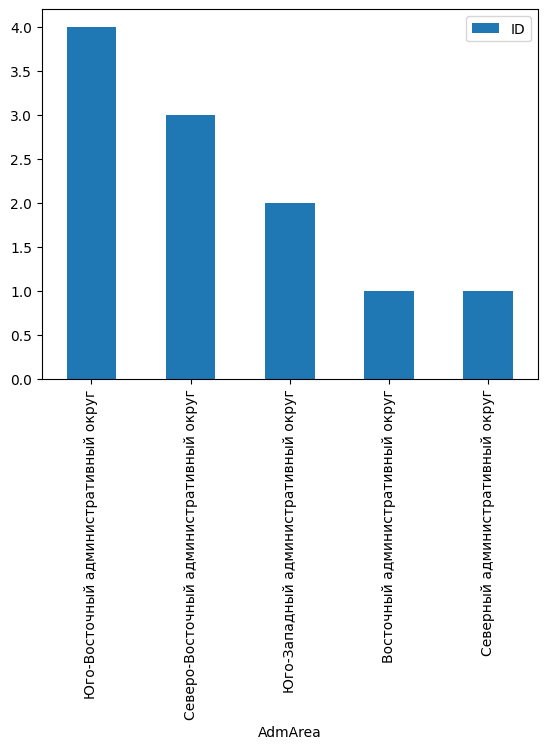

In [7]:
data.pivot_table(index='AdmArea', values='ID', aggfunc='count').sort_values(by='ID', ascending=False).plot(kind='bar')

**Задание 2.5.** Выполнить парсинг веб-страницы с помощью `JSON`

In [8]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint

# Для выполнения операций с регулярными выражениями
import re

In [9]:
resp = reqs.request(method='GET', url='https://apidata.mos.ru/v1/datasets/60789/features?api_key=22de8170-185c-4df6-a56e-1fe3dd1bdab4')

**Задание 2.6.** Выполнить парсинг веб-страницы с помощью `JSON`. Получите URL-адрес:

In [10]:
print(f"URL: \n\t {resp.url}")

URL: 
	 https://apidata.mos.ru/v1/datasets/60789/features?api_key=22de8170-185c-4df6-a56e-1fe3dd1bdab4


**Задание 2.7.** Выполнить парсинг веб-страницы с помощью `JSON`. Определите тип контента:

In [11]:
print(f"Content type: \n\t {resp.headers['content-type']}")

Content type: 
	 application/json


**Задание 2.8.** Выполнить парсинг веб-страницы с помощью `JSON`. Обработайте данные с помощью JSON:

In [12]:
if resp.status_code == 200:
   json_page = json.loads(resp.text)

**Задание 2.9.**  Обработайте данные с помощью `JSON`. Посмотреть на ключи:

In [13]:
for x in json_page:
    print(x)

features
type


Распечатать ключи и значения:

In [14]:
for x in json_page:
    print(f"{x} --> {json_page[x]} \n")

features --> [{'geometry': {'coordinates': [37.636778, 55.818675], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 1, 'CinemaName': 'Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»', 'AdmArea': 'Северо-Восточный административный округ', 'District': 'Останкинский район', 'Address': 'Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109', 'NumberOfAccessPoints': 7, 'WiFiName': 'Moscow_WiFi_Free', 'CoverageArea': 50, 'FunctionFlag': 'действует', 'AccessFlag': 'открытая сеть', 'Password': '', 'Latitude_WGS84': '55.818675', 'Longitude_WGS84': '37.636778', 'global_id': 879791944}, 'rowId': None, 'releaseNumber': 32, 'versionNumber': 1}, 'type': 'Feature'}, {'geometry': {'coordinates': [37.718534, 55.685873], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 3, 'CinemaName': 'Государственн

In [15]:
pprint.pprint(json_page)

{'features': [{'geometry': {'coordinates': [37.636778, 55.818675],
                            'type': 'Point'},
               'properties': {'attributes': {'AccessFlag': 'открытая сеть',
                                             'Address': 'Российская Федерация, '
                                                        'город Москва, '
                                                        'внутригородская '
                                                        'территория '
                                                        'муниципальный округ '
                                                        'Останкинский, '
                                                        'проспект Мира, дом '
                                                        '109',
                                             'AdmArea': 'Северо-Восточный '
                                                        'административный '
                                                        'округ',
  

**Задание 2.10.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`

In [16]:
from bs4 import BeautifulSoup as bso

In [17]:
# Отправление запроса на получение данных и присваивание ответ переменной.
source = reqs.get("https://apidata.mos.ru/v1/datasets/60789/features?api_key=22de8170-185c-4df6-a56e-1fe3dd1bdab4")

In [18]:
print(f"Content type: \n\t {source.headers['content-type']}")

Content type: 
	 application/json


In [19]:
print(source)

<Response [200]>


**Задание 2.10.1.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Создать beautiful soup объект.

In [20]:
mysoup = bso(source.text, 'html.parser')

**Задание 2.10.2.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Распечатайте HTML-содержимое страницы, используя метод prettify

In [21]:
print(mysoup.prettify())

{"features":[{"geometry":{"coordinates":[37.636778,55.818675],"type":"Point"},"properties":{"datasetId":60789,"attributes":{"is_deleted":0,"ID":1,"CinemaName":"Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»","AdmArea":"Северо-Восточный административный округ","District":"Останкинский район","Address":"Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109","NumberOfAccessPoints":7,"WiFiName":"Moscow_WiFi_Free","CoverageArea":50,"FunctionFlag":"действует","AccessFlag":"открытая сеть","Password":"","Latitude_WGS84":"55.818675","Longitude_WGS84":"37.636778","global_id":879791944},"rowId":null,"releaseNumber":32,"versionNumber":1},"type":"Feature"},{"geometry":{"coordinates":[37.718534,55.685873],"type":"Point"},"properties":{"datasetId":60789,"attributes":{"is_deleted":0,"ID":3,"CinemaName":"Государственное бюджетное учреждение культуры города Москвы «Московское кино»

**Задание 2.10.3.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Получить заголовок страницы

In [22]:
print(mysoup.title)

None
